Recording Speech

In [27]:
# Import libraries
import pyaudio # Used to interact with microphone
import wave # Used to read and write WAV files

# Set variables
FORMAT = pyaudio.paInt16 # Sample Size (16-bit int)
CHANNELS = 2 # Number of audio channels (Stereo)
RATE = 44100 # Sample rate (44100Hz)
             # This rate is CD quality
CHUNK = 1024 # Number of frames per buffer (1024)
             # Buffers move audio data from input to processing
             # Chunk refers to breaking up the audio signal
RECORD_SECONDS = 15 # Duration of recording (5s)

# Initialize PyAudio
audio = pyaudio.PyAudio() # Enables audio hardware interaction

# Open the audio stream
# This allows the script to receive audio data
stream = audio.open(format = FORMAT,
                    channels = CHANNELS,
                    rate = RATE,
                    input = True,
                    frames_per_buffer = CHUNK)

# Initialize an empty list to store audio data
# The frames contain the audio data
frames = []

# Calculate the total number of frames to capture
# Divide rate by chunk to get the number of frames
# needed every second
# Multiply by record_seconds to get how many frames total
# will be needed
num_frames = int((RATE / CHUNK) * RECORD_SECONDS)

# Record audio from stream in chuncks
# range() allows the loop to iterate the size of num_frames
for _ in range(num_frames):
    data = stream.read(CHUNK) # Read a chunk of audio data
    frames.append(data) # Add to list of frames

# Stop recording audio
stream.stop_stream() # Stop audio stream
stream.close() # Computing resources used for stream are released
audio.terminate() # PyAudio interface closed freeing resources

# Define the output WAV file name
output_file = "Track4.wav"

# Open the WAV file for writing
# Must provide the format of the audio data
with wave.open(output_file, 'wb') as wf:
    wf.setnchannels(CHANNELS) # Set the number of channels
    wf.setsampwidth(audio.get_sample_size(FORMAT)) # Set the sample width
    wf.setframerate(RATE) # Set the sample rate
    wf.writeframes(b''.join(frames)) # Write audio frames to file

print("Audio saved as:", output_file)



Audio saved as: Track4.wav


Time-Domain Plots

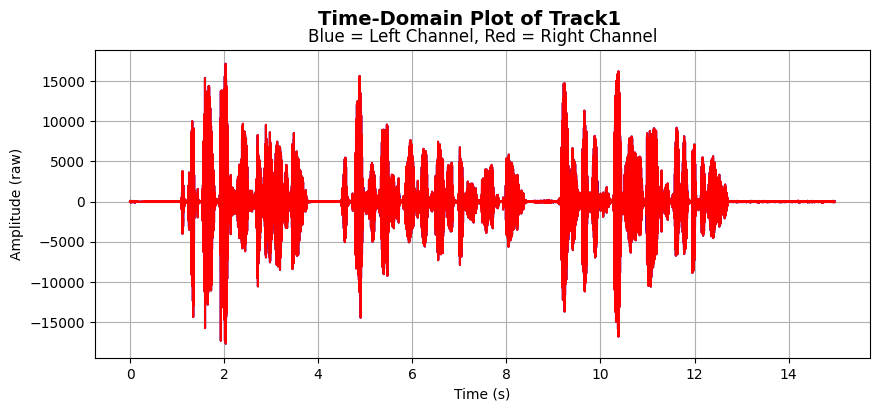

In [28]:
# Import Libraries
import wave # Used to read and write WAV files
import numpy as np # Used for numerical computing
import matplotlib.pyplot as plt # Used to create plots

# Open and read the WAV file
wav_file = "Track4.wav"
with wave.open(wav_file, 'rb') as wf:
    num_channels = wf.getnchannels()  # Get number of channels
    num_frames = wf.getnframes() # Get number of frames
    audio_data = wf.readframes(num_frames) # Get data from frames

# Convert audio data to array
# Data type of array is 16 bit to match sample size
audio_array = np.frombuffer(audio_data, dtype = np.int16)

# Reshape audio array into two-dimensional array (stereo)
audio_array = audio_array.reshape(-1, num_channels)

# Calculate time axis
time = np.arange(0, num_frames) / wf.getframerate()

# Plot and display time-domain waveform
plt.figure(figsize=(10, 4))
plt.plot(time, audio_array[:, 0], color='b', label='Left Channel') # Plot left channel
plt.plot(time, audio_array[:, 1], color='r', label='Right Channel') # Plot right channel
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (raw)')
plt.suptitle("Time-Domain Plot of Track1", fontsize=14, fontweight='bold')
plt.title('Blue = Left Channel, Red = Right Channel')
plt.grid(True)
plt.show()



Generate Spectrograms

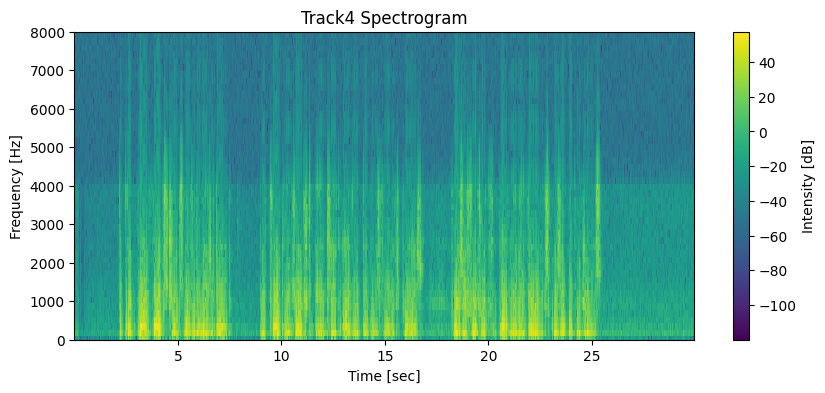

In [30]:
# Import libraries
import numpy as np # Used for numerical computing
import matplotlib.pyplot as plt # Used to create plots
from scipy.signal import spectrogram # Used to generate spectrograms
import wave # Used to read and write WAV files

# Open and read WAV file
wav_file = "Track4.wav"
with wave.open(wav_file, 'rb') as wf:
    num_channels = wf.getnchannels()  # Get number of channels
    num_frames = wf.getnframes() # Get number of frames
    audio_data = wf.readframes(num_frames) # Get data from frames

# Convert audio data to array
# Data type of array is 16 bit to match sample size
audio_array = np.frombuffer(audio_data, dtype = np.int16)

# Compute spectrogram
frequencies, times, Sxx = spectrogram(audio_array, fs=wf.getframerate())

# Plot and display spectrogram
plt.figure(figsize=(10, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))  # Convert to dB scale
plt.ylim(0, 8000) # Limiting the y-axis to 8000 Hz
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Track4 Spectrogram')
plt.colorbar(label='Intensity [dB]')
plt.show()
    

Create Time Delay in Right Channel

Head circumfrence was measured to be 19.5 inches or 0.4953 meters. Diameter is 0.157659 meters

In [34]:
# Import libraries 
import wave # Used to read and write WAV files
import numpy as np # Used for numerical computing

# Open and read the original WAV file
original_wav_file = "Track4.wav"
with wave.open(original_wav_file, 'rb') as wf:
    num_channels = wf.getnchannels()  # Get number of channels
    num_frames = wf.getnframes()  # Get number of frames
    sample_width = wf.getsampwidth()  # Get sample width
    frame_rate = wf.getframerate()  # Get frame rate
    audio_data = wf.readframes(num_frames)  # Get data from frames

# Convert audio data to array
audio_array = np.frombuffer(audio_data, dtype=np.int16)

# Reshape audio array into two-dimensional array
# Enables the adjustment of each channel
audio_array = audio_array.reshape(-1, num_channels)

# Calculate the ms second delay between ear canals
headDiameter = 0.157659
speedOfSoundInSec = 343
headDelay_ms = (headDiameter / speedOfSoundInSec) * 1000
# Calculate the number of samples for the desired delay in milliseconds
delay_ms = 1000  # The amount of delay in ms
delay_samples = int(headDelay_ms * frame_rate / 1000) # Frame rate / 1000 converts samples per second to per ms
print(headDelay_ms)
print(delay_samples)

# Apply delay to the right channel
# Creating a delayed version of the right channel
delayed_right_channel = np.concatenate((np.zeros((delay_samples, 1), dtype=np.int16), 
                                         audio_array[:-delay_samples, 1].reshape(-1, 1)))

# Create stereo audio with delayed right channel
delayed_audio = np.column_stack((audio_array[:, 0], delayed_right_channel.reshape(-1, 1)))

# Save delayed audio to a new WAV file
output_wav_file = "track4DelayHead.wav"  # Replace placeholders accordingly
with wave.open(output_wav_file, 'wb') as wf:
    wf.setnchannels(num_channels)
    wf.setsampwidth(sample_width)
    wf.setframerate(frame_rate)
    wf.writeframes(delayed_audio.tobytes())

20


Attenuate Right Channel

In [37]:
# Import libraries 
import wave # Used to read and write WAV files
import numpy as np # Used for numerical computing
import array # Used for array editing

# Open and read the original WAV file
original_wav_file = "Track4DelayHead.wav"
with wave.open(original_wav_file, 'rb') as wf:
    num_channels = wf.getnchannels()  # Get number of channels
    num_frames = wf.getnframes()  # Get number of frames
    sample_width = wf.getsampwidth()  # Get sample width
    frame_rate = wf.getframerate()  # Get frame rate
    audio_data = wf.readframes(num_frames)  # Get data from frames

# Convert audio data to array
audio_array = array.array('h', audio_data)

# Apply attenuation to the right channel
attenuation_dB = -6
attenuation_factor = 10 ** (attenuation_dB / 20)  # Calculate attenuation factor 

# Apply attenuation to the right channel
for i in range(1, len(audio_array), num_channels):
    audio_array[i] = int(audio_array[i] * attenuation_factor)

# Save modified audio data to a WAV file
attenuated_wav_file = "track4HeadAtten6dB.wav"

# Write to new WAV file
with wave.open(attenuated_wav_file, 'wb') as wf:
    wf.setnchannels(num_channels)
    wf.setsampwidth(sample_width)
    wf.setframerate(frame_rate)
    wf.writeframes(audio_array.tobytes())